# Визуализация данных

На семинаре мы будем заниматься построением различных визуализаций. Наша цель - провести **разведочный анализ данных**, чтобы исследовать поведение данных и выявить в них закономерности.

Мы продолжим работать с данными о пассажирах Титаника.

Цели:
* познакомиться с библиотекой seaborn
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

Бонус:
* придумаем свою модель на основе проведенного анализа и сравним с результатом работы метода ближайших соседей

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загрузим данные.

In [2]:
Data = pd.read_csv(
    "https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
    sep=";"
)

**Задание 1.** Выведите на экран размеры таблицы

In [3]:
Data.shape

(891, 12)

In [8]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


# Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

**Задание 2.** Выведите основные числовые характеристики числовых столбцов.

In [4]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
Data.head()

Функция не позволяет увидеть наличие пропусков в нечисловых столбцах.

**Обработаем признак 'Sex'**

**Задание 3.** Проверьте, есть ли пропуски в столбце.

In [7]:
Data[Data["Sex"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [11]:
Data['Sex'].value_counts()

,count
Sex,
male,574
female,312
unknown,5


**Задание 4.** Удалите пассажиров неизвестного пола, так как их всего 5.

In [13]:
Data[Data['Sex'] == 'unknown'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,Moran; Mr. James,unknown,NaN,0,0,330877,8.4583,NaN,Q
13,14,0,3,Andersson; Mr. Anders Johan,unknown,39.00,1,5,347082,31.2750,NaN,S
28,29,1,3,"O'Dwyer; Miss. Ellen ""Nellie""",unknown,NaN,0,0,330959,7.8792,NaN,Q
49,50,0,3,Arnold-Franchi; Mrs. Josef (Josefine Franchi),unknown,18.00,1,0,349237,17.8000,NaN,S
78,79,1,2,Caldwell; Master. Alden Gates,unknown,0.83,0,2,248738,29.0000,NaN,S


Признак 'Sex' является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать?

**Задание 5.** Придумайте кодировку и сделайте её.

In [17]:
Data['is_male'] = Data['Sex'].map({'male': 1, 'female': 0, 'unknown': 0})
Data['is_female'] = Data['Sex'].map({'female': 1, 'male': 0, 'unknown': 0})


In [ ]:
Data.head()

Посмотрим, как влияет пол на выживаемость.

<ipython-input-18-a922891d4227>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')


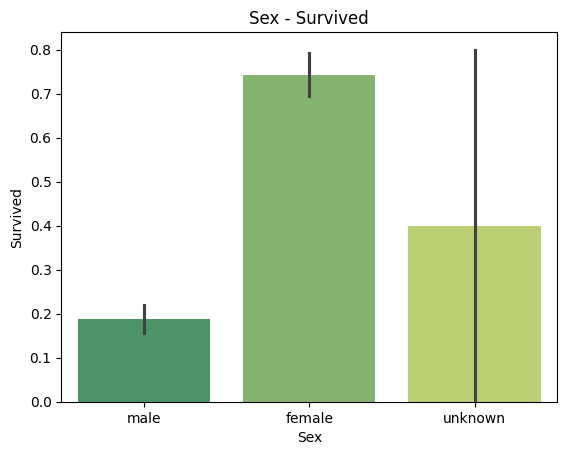

In [18]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')
plt.show()

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

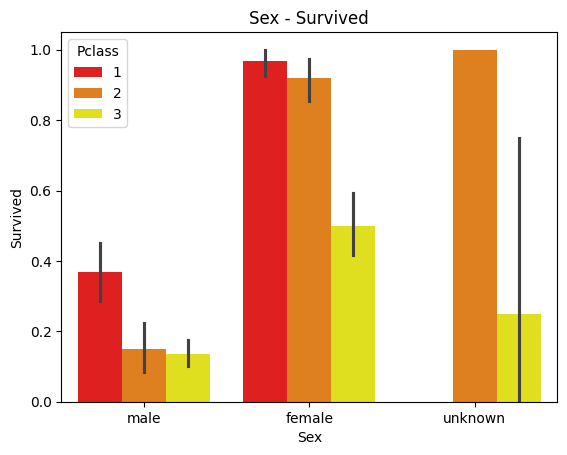

In [19]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show()

Ещё один полезный вид визуализации - ящик с усами. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

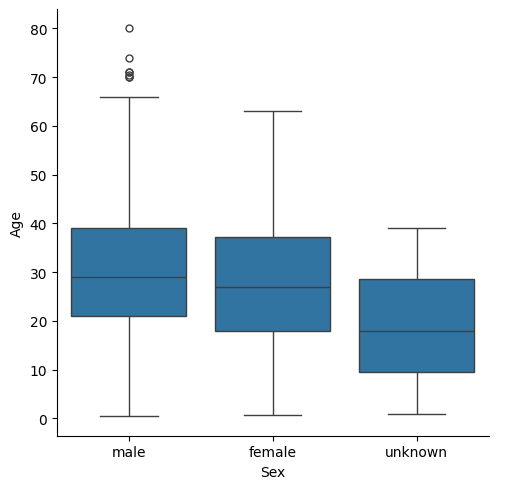

In [22]:
sns.catplot(x="Sex", y="Age", data=Data, kind="box") # box plot (box-and-whiskers-plot)
plt.show()

Можно детализировать картинку, добавив разделение по Pclass.

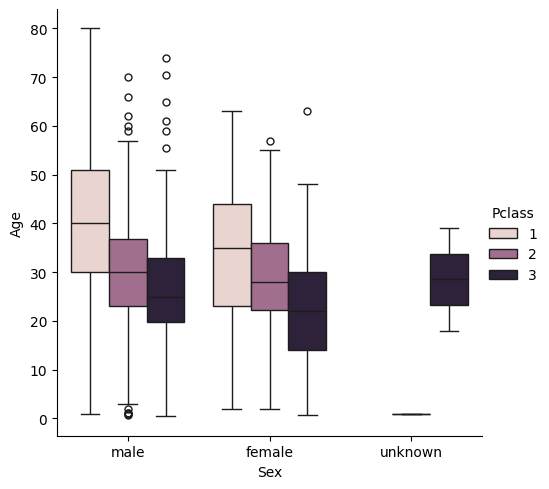

In [23]:
sns.catplot(x="Sex", y="Age",hue ="Pclass", data=Data, kind="box")
plt.show()

**Обработаем признак 'Embarked'**

In [24]:
print(Data['Embarked'].value_counts(dropna=False))
Data.shape

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


(891, 14)

**Задание 6.** Удалим из таблицы пассажиров, для которых неизвестен порт посадки (Embarked).

In [25]:
Data.dropna(subset=['Embarked'], inplace=True)
Data.shape

(889, 14)

**Задание 7.** Закодируем столбец Embarked с помощью OneHot-кодирования (pd.get_dummies).

In [26]:
Data = pd.get_dummies(Data, columns=['Embarked'], drop_first=True)
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,is_male,is_female,Embarked_Q,Embarked_S
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,1,0,False,True
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,0,1,False,False
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,False,True
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,0,1,False,True
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,1,0,False,True


**Обработаем признак 'Age'**

Проверьте, если ли в Age пропущенные значения.

In [27]:
Data[Data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,is_male,is_female,Embarked_Q,Embarked_S
5,6,0,3,Moran; Mr. James,unknown,NaN,0,0,330877,8.4583,NaN,0,0,True,False
17,18,1,2,Williams; Mr. Charles Eugene,male,NaN,0,0,244373,13.0000,NaN,1,0,False,True
19,20,1,3,Masselmani; Mrs. Fatima,female,NaN,0,0,2649,7.2250,NaN,0,1,False,False
26,27,0,3,Emir; Mr. Farred Chehab,male,NaN,0,0,2631,7.2250,NaN,1,0,False,False
28,29,1,3,"O'Dwyer; Miss. Ellen ""Nellie""",unknown,NaN,0,0,330959,7.8792,NaN,0,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,Razi; Mr. Raihed,male,NaN,0,0,2629,7.2292,NaN,1,0,False,False
863,864,0,3,"Sage; Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,0,1,False,True
868,869,0,3,van Melkebeke; Mr. Philemon,male,NaN,0,0,345777,9.5000,NaN,1,0,False,True
878,879,0,3,Laleff; Mr. Kristo,male,NaN,0,0,349217,7.8958,NaN,1,0,False,True


Заполним пропуски медианным значением Age.

In [3]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

<ipython-input-3-a6a754c7810e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Age'].fillna(median_age, inplace=True)


Нарисуем распределение возраста пассажиров.

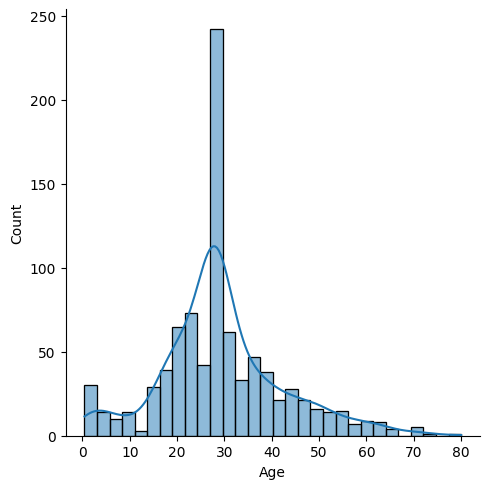

In [5]:
sns.displot(Data['Age'], kde=True)
plt.show()

Посмотрим на распределение Pclass по возрастам.

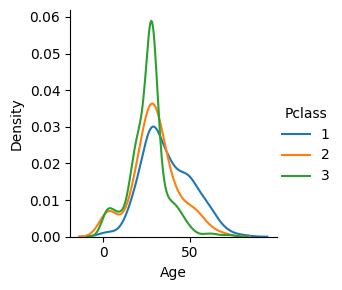

In [7]:
import seaborn as sns

facet = sns.FacetGrid(data = Data, hue = "Pclass", legend_out=True)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

**Обработаем признак 'Fare'**

1) Проверьте, если ли в Fare пропущенные значения

2) Если пропущенные значения есть, заполните их медианным значением Fare

In [14]:
#your code here
print(Data[Data['Fare'].isnull()].size)
Data['Fare'].value_counts().sort_index()

0


,count
Fare,
0.0000,15
4.0125,1
5.0000,1
6.2375,1
6.4375,1
...,...
227.5250,4
247.5208,2
262.3750,2


**Обработаем признак 'Pclass'**

Есть ли в Pclass пропущенные значения?

In [15]:
Data['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


**Задание 8.** Нарисуйте гистограмму выживаемости в зависимости от Pclass.

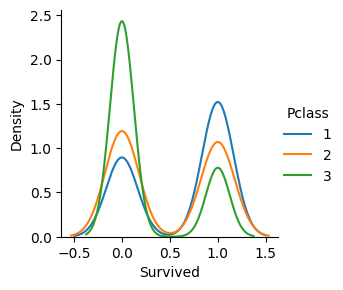

In [19]:
#your code here

facet = sns.FacetGrid(data = Data, hue = "Pclass", legend_out=True)
facet = facet.map(sns.kdeplot, "Survived")
facet.add_legend();

**Обработаем признак 'SibSp' (число братьев или сестер, мужей, жен)**

Есть ли в SibSp пропущенные значения?

In [ ]:
Data['SibSp'].value_counts()

**Обработаем признак 'Parch' (число родителей/детей)**

Есть ли в Parch пропущенные значения?

In [ ]:
Data['Parch'].value_counts()

**Задание 9.** Столбец PassengerId является категориальным и не несёт важной информации, удалите его.

In [20]:
Data = Data.drop("PassengerId", axis=1)

In [21]:
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


# Исследование признаков и feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной.

**Задание 10.** Создайте таблицу NumericData, которая содержит только числовые столбцы из таблицы Data.

In [23]:
#your code here
NumericData = Data[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]]

In [24]:
NumericData.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


<Axes: title={'center': 'Pearson Correlation of Features'}>

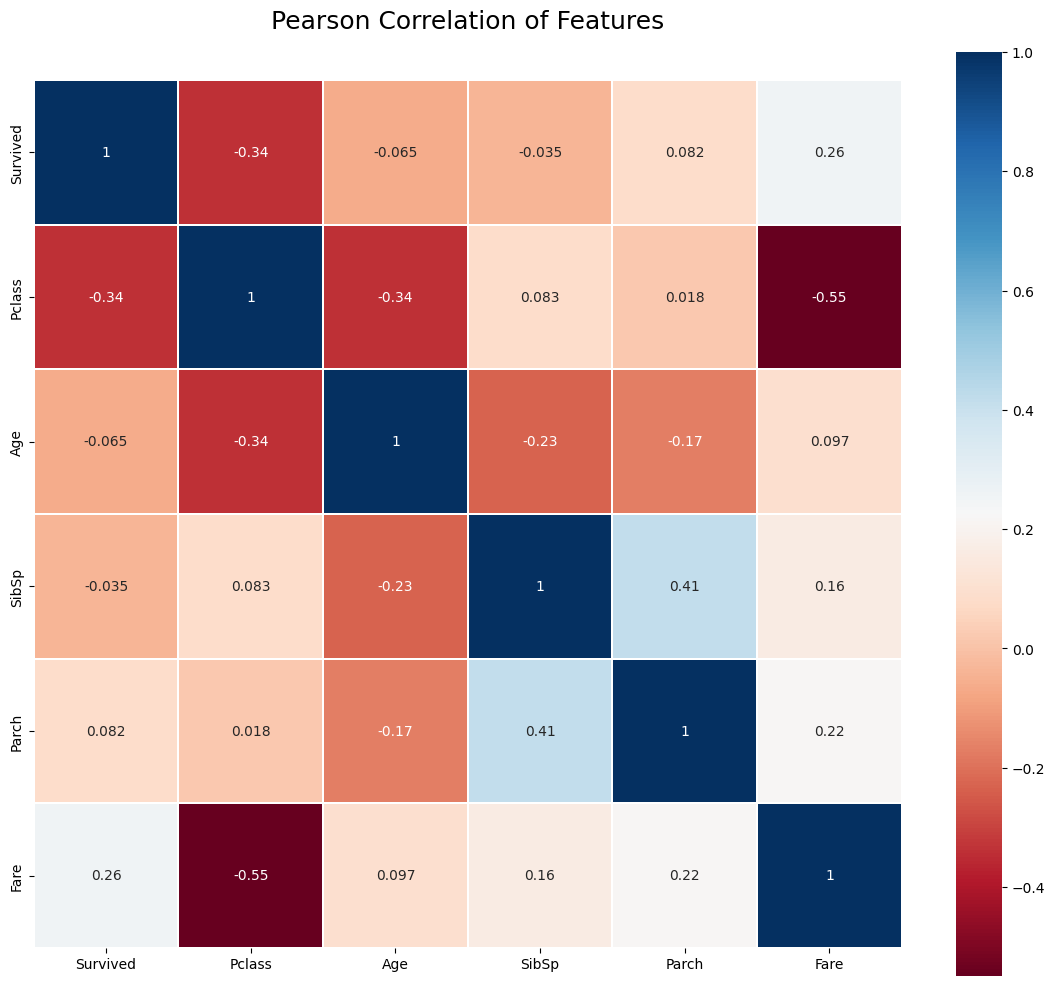

In [25]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)

Посмотрим на попарные зависимости некоторых признаков.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/a

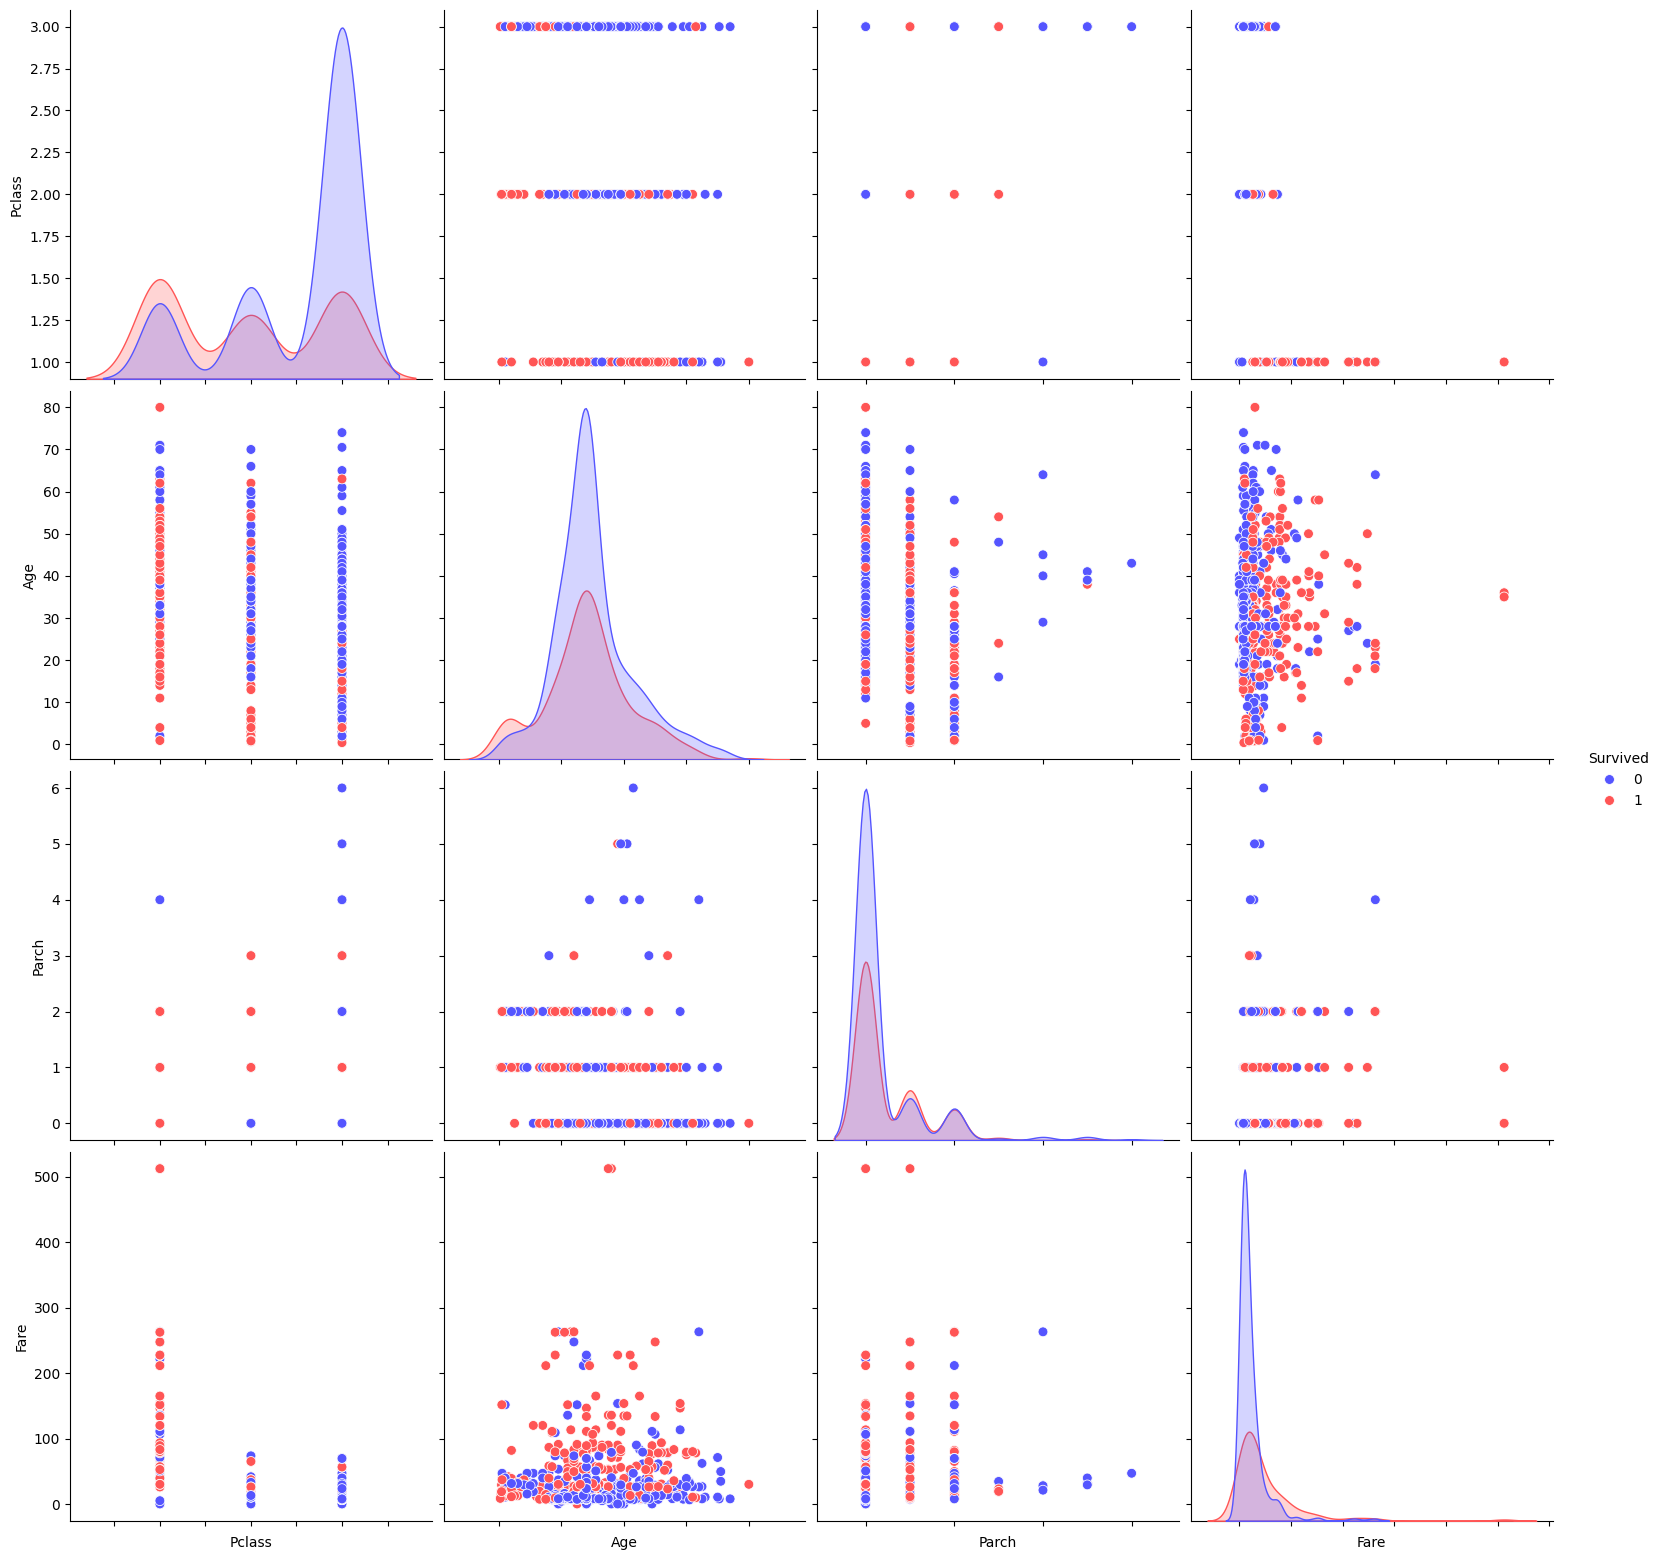

In [26]:
g = sns.pairplot(Data[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare']], \
                 hue='Survived', palette = 'seismic', size=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [39]:
Data['AgeBin'] = pd.cut(Data['Age'].astype(int), 5)
print(Data['AgeBin'].unique())
Data[['AgeBin', "Age"]].head(5)

[(16.0, 32.0], (32.0, 48.0], (48.0, 64.0], (-0.08, 16.0], (64.0, 80.0]]
Categories (5, interval[float64, right]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] <
                                           (48.0, 64.0] < (64.0, 80.0]]


,AgeBin,Age
0,"(16.0, 32.0]",22.0
1,"(32.0, 48.0]",38.0
2,"(16.0, 32.0]",26.0
3,"(32.0, 48.0]",35.0
4,"(32.0, 48.0]",35.0


Теперь переведём полученные интервалы в числа, используя LabelEncoder.

In [33]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

Data['AgeBin_Code'] = label.fit_transform(Data['AgeBin'])

Data[['Age','AgeBin','AgeBin_Code']].head()

,Age,AgeBin,AgeBin_Code
0,22.0,"(16.0, 32.0]",1
1,38.0,"(32.0, 48.0]",2
2,26.0,"(16.0, 32.0]",1
3,35.0,"(32.0, 48.0]",2
4,35.0,"(32.0, 48.0]",2


In [37]:
np.corrcoef(Data['Age'], Data['Survived'])

array([[ 1.        , -0.06491042],
       [-0.06491042,  1.        ]])

In [38]:
np.corrcoef(Data['AgeBin_Code'], Data['Survived'])

array([[ 1.        , -0.04449227],
       [-0.04449227,  1.        ]])

**Задание 11.** Бинаризуйте Fare, используя разбиение на 4 интервала.

In [40]:
Data['FareBin'] = pd.cut(Data['Fare'].astype(int), 4)
print(Data['FareBin'].unique())
Data[['FareBin', "Fare"]].head(5)

[(-0.512, 128.0], (256.0, 384.0], (128.0, 256.0], (384.0, 512.0]]
Categories (4, interval[float64, right]): [(-0.512, 128.0] < (128.0, 256.0] < (256.0, 384.0] <
                                           (384.0, 512.0]]


,FareBin,Fare
0,"(-0.512, 128.0]",7.2500
1,"(-0.512, 128.0]",71.2833
2,"(-0.512, 128.0]",7.9250
3,"(-0.512, 128.0]",53.1000
4,"(-0.512, 128.0]",8.0500


Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки Parch и SibSp слабо коррелируют с выживаемостью (Survived). Сконструируем новые признаки, чтобы решить эти вопросы.

**Задание 12.**

1) Создайте признак 'NameLen' и запишите в него длину имени (Name).

2) Создайте признак 'FamilySize', равный Parch + SibSp + 1. Зачем добавлять 1?

3) Создайте признак 'IsAlone', который показывает, путешествовал человек один или с семьей.

In [ ]:
#your code here

**Задание 13.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом 'Survived'.

In [ ]:
#your code here

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков.

**Задание 14*.** Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [ ]:
#your code here

**Задание 15.** Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то это означает, что он не влияет на выживаемость и бесполезен для нашей задачи?

# Бонус.

**Задание 16*.** Мы провели довольно подробный однофакторный анализ данных и увидели, какие признаки сильно влияют на выживаемость, а какие нет.

a) Попробуйте написать свою модель для предсказания выживаемости, используя обнаруженные закономерности.

b) Оцените качество модели - вычислите долю правильных ответов алгоритма по всем данным.

In [ ]:
def prediction(x):
    # x - один объект
    ...

In [ ]:
from sklearn.metrics import accuracy_score

pred = Data.apply(lambda x: prediction(x), axis=1)

accuracy_score(Data['Survived'], pred)

In [ ]:
Data['Survived']

Разобъем данные на тренировочную и тестовую часть с помощью train_test_split.

2) Обучим KNN на тренировочной части, сделаем предсказание на тесте и вычислим долю правильных ответов.

3) С помощью написанной нами раннее модели сделаем предсказание на тесте и оценим его качество.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

y = Data['Survived']
X = Data._get_numeric_data().drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
model = KNeighborsClassifier()

model.fit(X_train, y_train) # обучаем модель

In [ ]:
pred_knn = model.predict(X_test) # делаем предсказание на тесте
pred_knn

In [ ]:
accuracy_score(y_test, pred_knn) #  доля прав.ответов knn

In [ ]:
pred_our = X_test.apply(lambda x: prediction(x), axis=1)

accuracy_score(y_test, pred_our) # доля прав.ответов нашей модели